## Unsupervised machine learning: Kmeans algorithm

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Choosing numerical variables and standerdization
#### 3. The elbow technique
#### 4. Determining the number of clusters
#### 5. k-means clustering
#### 6. Add a new columns:"clusters"
#### 7. Visualizations
#### 8. Interpret results
#### 9.Calculate the descriptive statistics 
#### 10. Use of the results

### 1.Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pylab as pl

In [2]:
#creating string path

path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 6\Tasks Achievement 6'

In [3]:
df = pd.read_excel(os.path.join(path, 'Cleaned Data Set.xlsx'), index_col = False)

In [4]:
df.shape

(246022, 40)

In [5]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [6]:
# to display the graphs without the need to call them specifically
%matplotlib inline

### 2.Checking data types and creating subset of numerical variables only

In [7]:
#Checking data types of variables
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays             int64
MentalHealthDays               int64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                     int64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

## 2.Creating a subset with only numerical variables
## Checking data types

In [8]:
df_sub = df[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']]

In [9]:
df_sub

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4,0,9,1.60,71.67,27.99
1,0,0,6,1.78,95.25,30.13
2,0,0,8,1.85,108.86,31.66
3,5,0,9,1.70,90.72,31.32
4,3,15,5,1.55,79.38,33.07
...,...,...,...,...,...,...
246017,0,0,6,1.78,102.06,32.28
246018,0,7,7,1.93,90.72,24.34
246019,0,15,7,1.68,83.91,29.86
246020,2,2,7,1.70,83.01,28.66


In [10]:
#confirming data types to be numerical
df_sub.dtypes

PhysicalHealthDays      int64
MentalHealthDays        int64
SleepHours              int64
HeightInMeters        float64
WeightInKilograms     float64
BMI                   float64
dtype: object

### 2.Standardization of numerical variables

In [11]:
# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sub)

### 3.The elbow technique: to determine the number of clusters needed

In [12]:
#defining range of clusters and then defining kmeans clusters in the range
num_cl = range(2, 30, 2)
kmeans = [KMeans(n_clusters = i)for i in num_cl]

In [13]:
#Creating a score that gives the rate of variation for a given cluster
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

In [14]:
score

[-1174737.023878335,
 -857361.2453819171,
 -699726.7443524022,
 -616994.443751069,
 -550577.8699537923,
 -509936.22036345967,
 -475806.2995108591,
 -447738.2914992738,
 -426708.73864574457,
 -409921.62709434057,
 -391954.12793669873,
 -378417.6314280088,
 -364341.40691499703,
 -351434.50724777754]

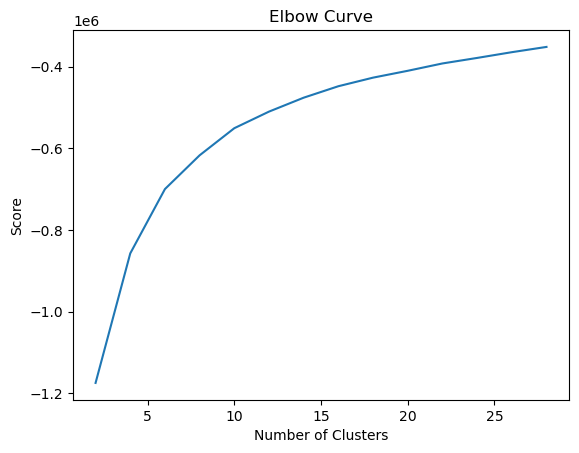

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  4.In this visualization, there's a steep curve till 10, but after that, the curve of the slope reduces quite a bit. This means that the optimal count for your clusters is 10.

### Convert df_scaled from NumPy array to Pandas DataFrame

In [16]:
# Create a Pandas DataFrame from the NumPy array df_scaled with specified column names
df_scaled = pd.DataFrame(data=df_scaled, columns=[
    'PhysicalHealthDays',
    'MentalHealthDays',
    'SleepHours',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI'
])


### 5. KMeans algorithm

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 10) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

### 6.Creating a new column to your dataframe with the resulting clusters

In [19]:
#Creating new column: 'clusters'
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df_scaled.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,clusters
0,-0.014160,-0.514292,1.373428,-0.985904,-0.560199,-0.104105,7
1,-0.490020,-0.514292,-0.708924,0.701799,0.545644,0.224420,4
2,-0.490020,-0.514292,0.679311,1.358128,1.183918,0.459300,4
3,0.104805,-0.514292,1.373428,-0.048291,0.333198,0.407105,5
4,-0.133125,1.336949,-1.403041,-1.454710,-0.198619,0.675759,3


In [21]:
df_scaled['clusters'].value_counts()

clusters
0    53149
7    50565
4    32728
5    31457
2    26373
3    16072
8    13911
1    11048
9     7811
6     2908
Name: count, dtype: int64

### 7.Different visualizations (e.g., scatterplots) using your clustered data

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


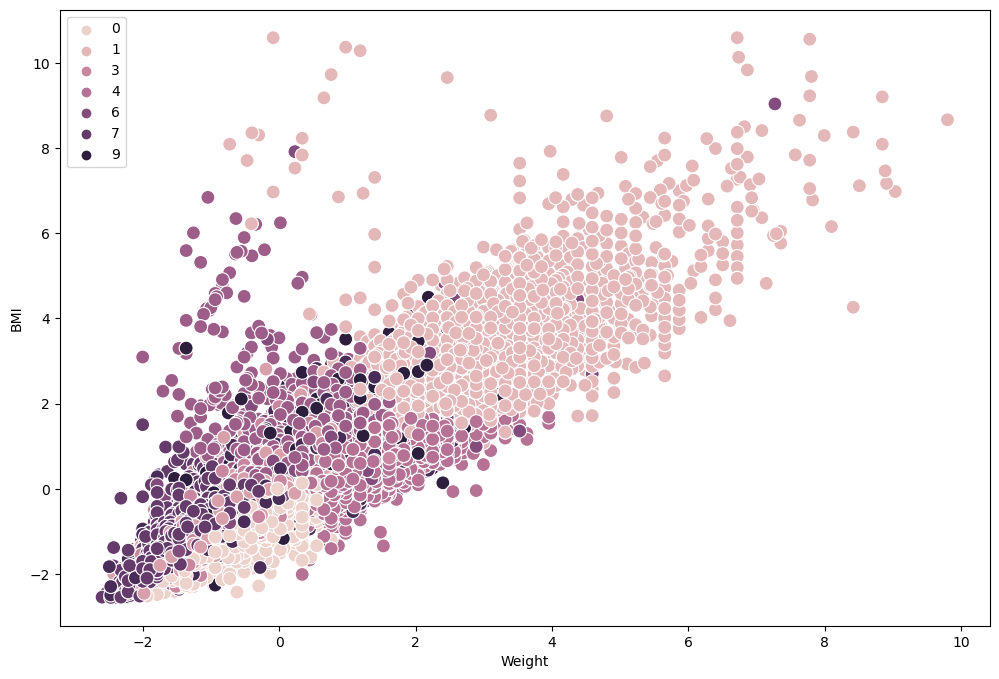

In [22]:
# Plot the clusters for the "BMI" and "WeightInKilograms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['WeightInKilograms'], y=df_scaled['BMI'], hue=kmeans.labels_, s=100, cmap='RdBu') 
ax.grid(False) 
plt.xlabel('Weight') 
plt.ylabel('BMI') 
plt.savefig('cluster_plot.png')
plt.show()

### In the scatterplot above, notable observations include:
#### 1. Analysis of Darker Purple Data Points (Clusters 6 to 9):
   - Data points colored in darker purple hues exhibit lower to moderate weights coupled with lower to moderate BMI values. We notice some outliers that have low weights but moderate to high BMI, , suggesting potential anomalies or unique characteristics within these cases.

#### 2. Analysis of Pink Data Points (Clusters 0 to 4):
   - Conversely, pink-colored data points (clusters 0 to 4) showcase moderate to high weights accompanied by moderate to high BMI values in most cases.
   - However, we notice that some pink data points demonstrate low to moderate weights but display disproportionately high BMI values.



C:\Users\nikman\AppData\Local\Temp\ipykernel_26368\60898941.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('cluster_plot_Physical HealthDays.png')
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


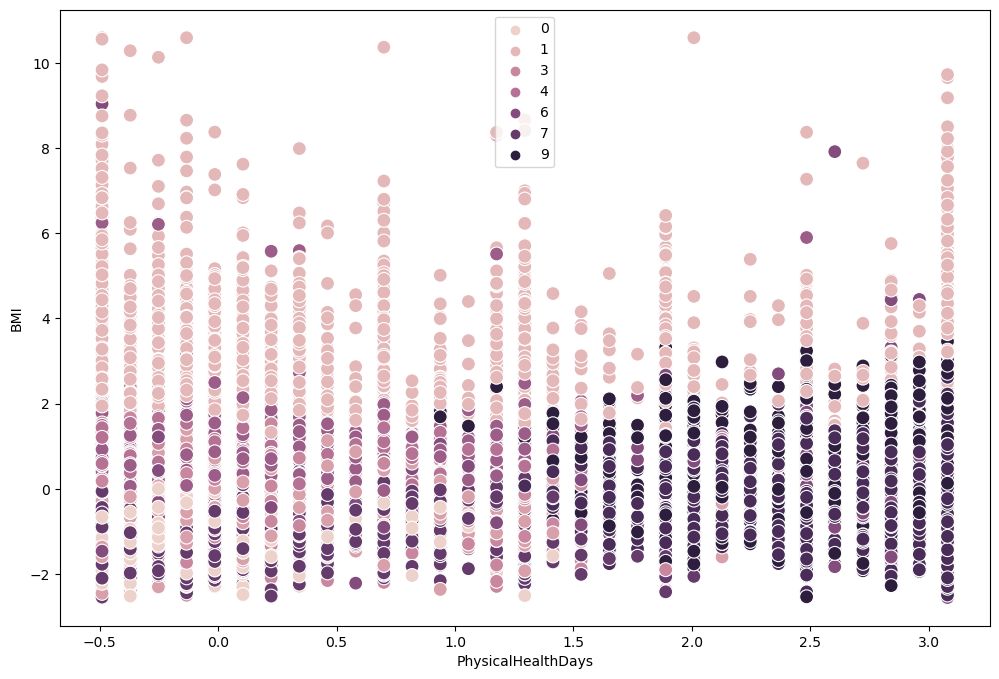

In [29]:
# Plot the clusters for the "BMI" and "Physical Health Days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['PhysicalHealthDays'], y=df_scaled['BMI'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('PhysicalHealthDays') 
plt.ylabel('BMI') 
plt.savefig('cluster_plot_Physical HealthDays.png')
plt.show()

### The scatter plot reveals a scattered distribution of data points, suggesting no apparent relationship between BMI and Physical Health Days.

C:\Users\nikman\AppData\Local\Temp\ipykernel_26368\2789371484.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('cluster_plot_MentalHealthDays.png')
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


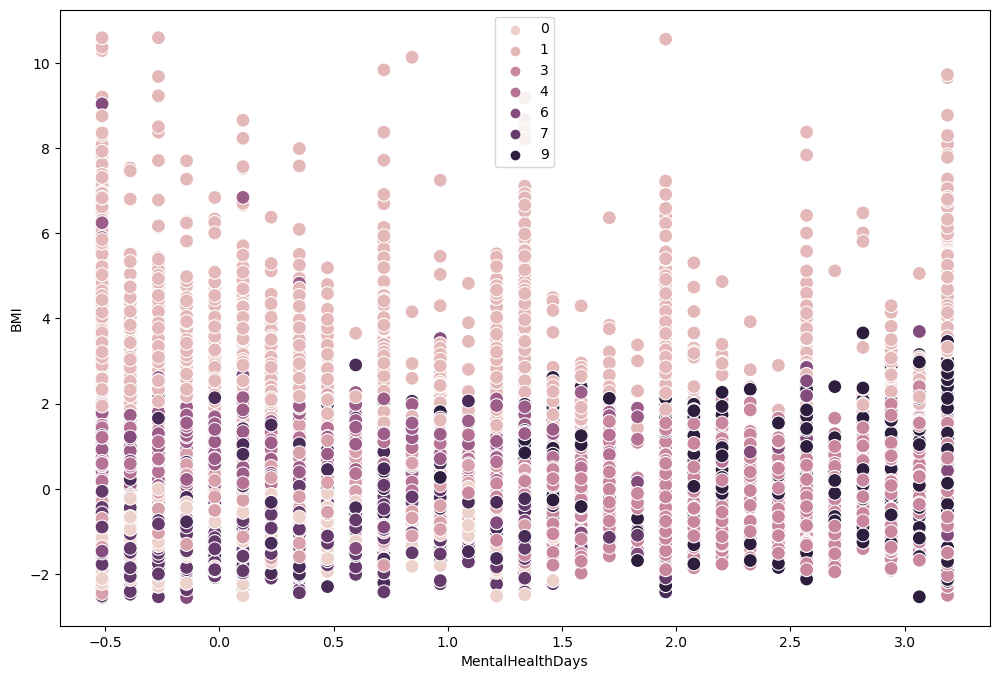

In [30]:
# Plot the clusters for the "BMI" and "MentalHealthDays" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['MentalHealthDays'], y=df_scaled['BMI'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('MentalHealthDays') 
plt.ylabel('BMI')
plt.savefig('cluster_plot_MentalHealthDays.png')
plt.show()

### The scatter plot reveals a scattered distribution of data points, suggesting no apparent relationship between BMI and Mental Health Days.

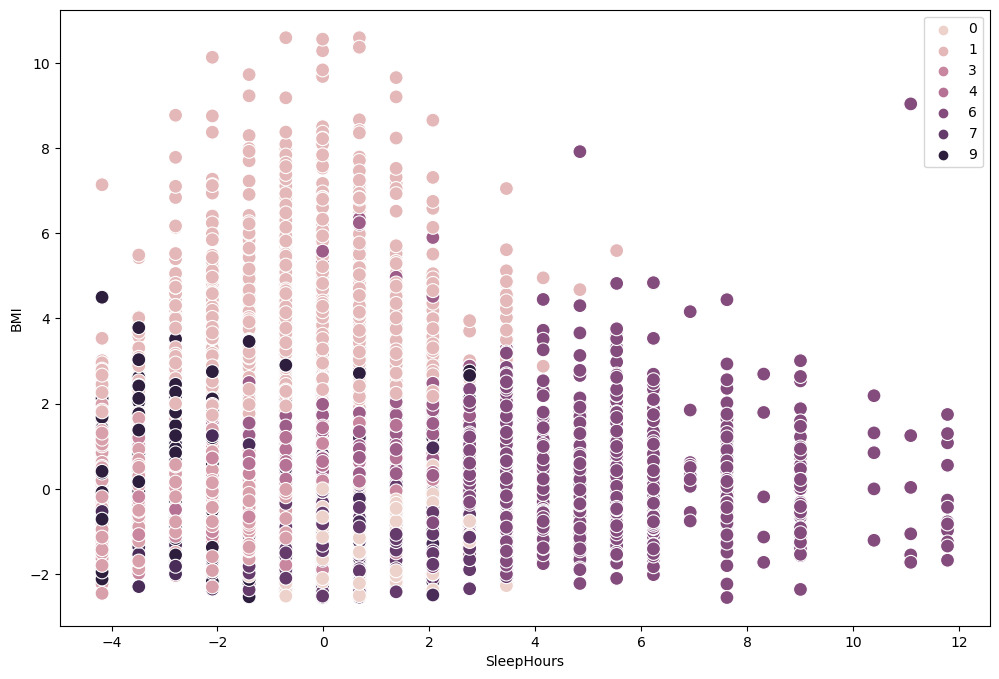

In [31]:
# Plot the clusters for the "BMI" and "SleepHours" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['SleepHours'], y=df_scaled['BMI'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('SleepHours') 
plt.ylabel('BMI')
plt.savefig('cluster_plot_SleepHours.png')
plt.show()

### BMI and Sleep hours
   - The data points representing less to moderately slept hours (in shades of purple) correlate with lower to moderate BMI values. 

   - Meanwhile, those shaded in pink are dispersed across the sleep hour spectrum, with higher BMI values tending to align with fewer hours of sleep on the right side of the plot. As sleep hours increase, there's a trend of decreasing BMI.

   - Overall, the scatter plot illustrates a dispersed arrangement of data points, indicating no clear correlation between BMI and sleep hours.

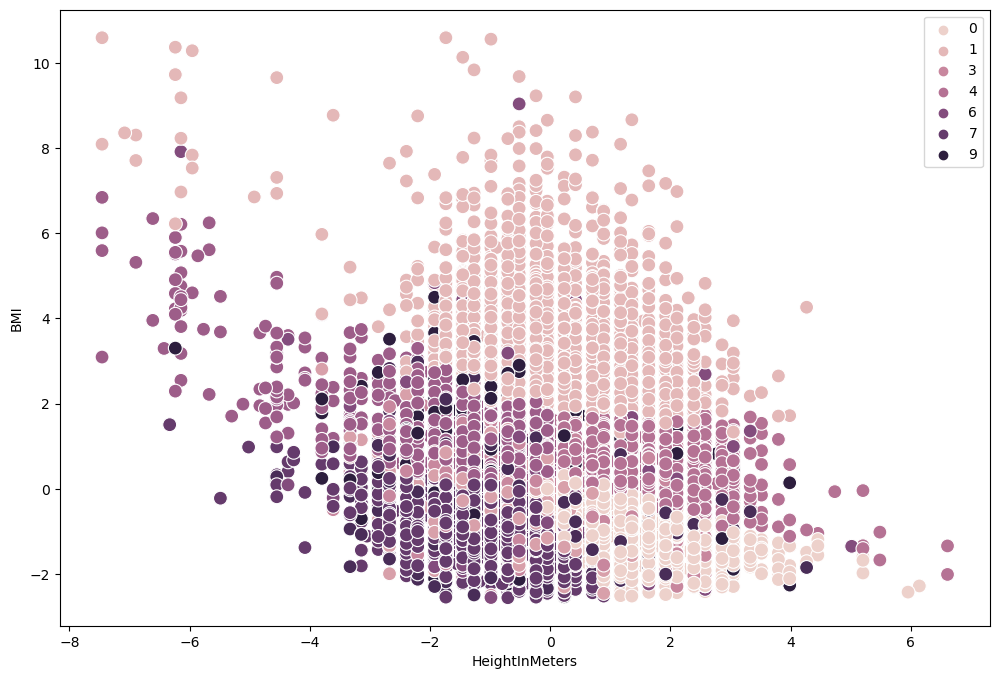

In [32]:
# Plot the clusters for the "BMI" and "HeightInMeters" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['HeightInMeters'], y=df_scaled['BMI'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('HeightInMeters') 
plt.ylabel('BMI') 
plt.savefig('cluster_plot_Height.png')
plt.show()

### In the scatterplot above, several observations can be made:

#### 1. Height vs. BMI Distribution:
   - The majority of data points are clustered around the middle values of Height on the x-axis, indicating a common range of heights.
   - However, the distribution is more spread out concerning BMI on the y-axis, suggesting greater variability in BMI among the data points.

#### 2. Analysis of Clustered Data:
   - Data points colored pink (cluster 0 to 4) appear to have moderate to high BMI values despite not exhibiting notably higher heights.
   - Conversely, data points colored in darker purple shades (cluster 6 to 9) show heights that are predominantly clustered around the middle range. However, there are outliers with very high and very low heights.
   - Interestingly, the BMI values for the purple and darker purple clusters tend to be lower to middle-range, with fewer instances of high BMI values.


### 8.Insights from cluster analysis

### 1. Cluster 6 to 9 (Purple, Darker Purple):
   - These clusters exhibit lower to moderate weights along with lower to moderate BMI values, which aligns with expectations of typical weight-BMI relationships.
   - However, the presence of outliers with low weights but moderate to high BMI values suggests potential anomalies or unique cases within these clusters.
   - Possible interpretations could include individuals with higher muscle mass relative to their weight or individuals with medical conditions affecting BMI, or data collection bias or errors.

### 2. Cluster 0 to 4 (Pink):
   - These clusters demonstrate moderate to high weights accompanied by corresponding moderate to high BMI values, indicating a more expected weight-BMI relationship.
   - Notably, the presence of several data points with low to moderate weights but disproportionately high BMI values raises questions and warrants further investigation.
   - Potential explanations for these outliers may include individuals with high body fat percentage despite lower weight, individuals with metabolic disorders, or measurement bias.



### 9.descriptive statistics for your clusters using the groupby() function

In [27]:
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'lighest pink'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'lighter pink'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'light pink'
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'pink'
df_scaled.loc[df_scaled['clusters'] == 4, 'cluster'] = 'dark pink'
df_scaled.loc[df_scaled['clusters'] == 5, 'cluster'] = 'light purple'
df_scaled.loc[df_scaled['clusters'] == 6, 'cluster'] = 'purple'
df_scaled.loc[df_scaled['clusters'] == 7, 'cluster'] = 'dark purple'
df_scaled.loc[df_scaled['clusters'] == 8, 'cluster'] = 'darker purple'
df_scaled.loc[df_scaled['clusters'] == 9, 'cluster'] = 'darkest purple'


In [28]:
df_scaled.groupby('cluster').agg({'PhysicalHealthDays':['mean', 'median'], 
                         'MentalHealthDays':['mean', 'median'], 
                         'SleepHours':['mean', 'median'],
                          'HeightInMeters':['mean', 'median'],
                           'WeightInKilograms': ['mean','median'],
                          'BMI':['mean','median']})

PhysicalHealthDays           MentalHealthDays            \
                             mean    median             mean    median   
cluster                                                                  
dark pink               -0.328203 -0.490020        -0.333848 -0.514292   
dark purple             -0.329991 -0.490020        -0.315113 -0.514292   
darker purple            2.798628  3.078933        -0.198606 -0.514292   
darkest purple           2.697288  3.078933         2.754094  3.188191   
lighest pink            -0.362668 -0.490020        -0.372750 -0.514292   
light pink              -0.282092 -0.490020        -0.267834 -0.514292   
light purple            -0.288857 -0.490020        -0.299984 -0.514292   
lighter pink             0.263450 -0.252090         0.258164 -0.267460   
pink                    -0.129476 -0.490020         2.478433  2.817943   
purple                   0.825019  0.342735         0.597089 -0.144044   

               SleepHours           HeightInMeters            \
                     mean    median           mean    median   
cluster                                                        
dark pink       -0.088761 -0.014807       1.132786  1.170605   
dark purple      0.320495 -0.014807      -0.851836 -0.704620   
darker purple   -0.083066 -0.014807      -0.098343 -0.048291   
darkest purple  -0.763042 -0.708924      -0.173646 -0.235814   
lighest pink     0.310240 -0.014807       0.754871  0.701799   
light pink      -1.205726 -0.708924      -0.235334 -0.235814   
light purple     0.221141 -0.014807      -0.764554 -0.704620   
lighter pink    -0.254870 -0.014807       0.137610  0.232993   
pink            -0.377067 -0.708924      -0.130093 -0.235814   
purple           3.797827  3.455781      -0.195801 -0.235814   

               WeightInKilograms                 BMI            
                            mean    median      mean    median  
cluster                                                         
dark pink               1.128474  0.971473  0.564012  0.523777  
dark purple            -1.020788 -1.007132 -0.752404 -0.750409  
darker purple          -0.055204 -0.092162 -0.003368 -0.073402  
darkest purple          0.199641  0.120284  0.337137  0.250518  
lighest pink           -0.145694 -0.092162 -0.519479 -0.458728  
light pink             -0.404746 -0.411534 -0.318509 -0.312887  
light purple            0.276698  0.226741  0.819185  0.707997  
lighter pink            2.439970  2.247553  2.655927  2.407424  
pink                   -0.202896 -0.262400 -0.146528 -0.199285  
purple                 -0.030963 -0.092162  0.086942 -0.048839

### Height in Meters, Weight in Kilograms, and BMI:
   - The mean and median values for height, weight, and BMI vary across clusters, indicating variations in height, weight, and BMI distributions among clusters.
   - Clusters like "light pink" and "darker purple" show higher mean and median values for height, weight, and BMI, indicating taller individuals with higher weight and BMI on average.
   - Clusters such as "lightest pink" exhibit the lowest mean and median values for height, weight, and BMI. This suggests that individuals within this cluster tend to be shorter and have lower weight and BMI on average compared to other clusters.

### 10. Use of these insights in future steps

- Diverse BMI-Wight Relationships: The cluster analysis revealed distinct categories within the data, indicating that individuals with lower weights generally have lower BMI, while those with higher weights tend to exhibit higher BMI. However,  exceptions exist, where individuals have lower weight yet higher BMI or have higher weight and lower BMI. This suggests the need to explore multifactor variables with BMI and their potential impact on conditions like heart disease.

- Limited Influence of Height on BMI: Interestingly, the analysis indicated that height does not significantly influence BMI and cannot be reliably grouped into categories based on BMI alone.

-  Relationship between BMI and Sleep Hours: The cluster analysis reinforces the lack of a clear correlation between BMI and sleep hours. The data did not reveal a consistent pattern linking sleep duration to BMI. 

#### Further research and analysis are warranted to better understand the multifaceted factors influencing BMI and its effect on heart disease.